In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号 

data=pd.read_csv('E:/an/pclass/contents/ershoufang.csv',encoding='GB18030')
# data.shape    #1.了解数据基本信息
# data.info()
# data.head()
# data.describe()

,楼盘,地址,单价,总价,户型,面积,年代,方向,楼层,装修,标题,详情url
count,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053
unique,50,50,74,57,8,71,19,8,32,4,87,84
top,洺悦城,巴南龙洲湾渝南大道与箭河路交汇处,9391元/㎡,67万,3室2厅1卫,71.4㎡,2019年竣工/普通住宅\,南,低层(共33层),精装修,南坪商圈云满庭B区正朝南大两房，光线充足，户型方正,https://cq.58.com/ershoufang/2517567868216334x...
freq,325,325,52,52,312,52,168,461,118,712,24,24


In [2]:
#2.处理缺失数据
# data.dropna()



In [3]:
# 5.处理字符型字段
for i in data.index:
    sy=data.loc[i,['年代']].values
    sy2=str(sy)
    sy3=sy2.split('/')[0].split("['")[1]
    data.loc[i,['年代']]=sy3

data[data=='暂无建造年代']=0


for i in data.index:
    sy=data.loc[i,['年代']].values
    if sy!=0:
        val=data.loc[i,['年代']].values
        val2=str(val)
        val3=val2.split('年')[0].split("['")[1]
        data.loc[i,['年代']]=int(val3)

for i in data.index:
    sy=data.loc[i,['楼层']].values
    if sy=='暂无楼层':
        data.loc[i,['楼层']]=0

for i in data.index:
    sy=data.loc[i,['单价']].values
    sy2=str(sy)
    sy3=sy2.split('元')[0].split("['")[1]
    data.loc[i,['单价']]=float(sy3)

for i in data.index:
    sy=data.loc[i,['总价']].values
    sy2=str(sy)
    sy3=sy2.split('万')[0].split("['")[1]
    data.loc[i,['总价']]=float(sy3)

for i in data.index:
    sy=data.loc[i,['面积']].values
    sy2=str(sy)
    sy3=sy2.split('㎡')[0].split("['")[1]
    data.loc[i,['面积']]=float(sy3)

data.head()

,楼盘,地址,单价,总价,户型,面积,年代,方向,楼层,装修,标题,详情url
0,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391.0,67.0,3室2厅1卫,71.4,2016,南北,高层(共30层),精装修,颜龙山水城 3室2厅 精装修 南北通透 房东急置换 诚意买房,https://cq.58.com/ershoufang/2489182283504648x...
1,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391.0,67.0,3室2厅1卫,71.4,0,南,0,精装修,两江新区 万华麓悦江城 重庆首开 千亩江城墅区 全屋豪装交付,https://cq.58.com/ershoufang/2307082909821961x...
2,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391.0,67.0,3室2厅1卫,71.4,2015,南北,低层(共30层),精装修,总部企业天地旁，正规三房，全网 ，真 格在售,https://cq.58.com/ershoufang/2349081413280783x...
3,嘉裕国际社区,江津双福新区创业路99号,5109.0,45.8,3室2厅1卫,89.7,2020,南,低层(共18层),精装修,正南 4室2厅 万科观承观峰三组团 精装修,https://cq.58.com/ershoufang/2524594793339904x...
4,华宇城,沙坪坝凤天路凤西路169号,13864.0,122.0,3室2厅1卫,88.0,2012,东,低层(共33层),精装修,杨家坪 保利花半里一期（玫瑰园） 3房,https://cq.58.com/ershoufang/2504268451881984x...


In [5]:
for i in data.index:
    sy=data.loc[i,['年代']].values
    if sy==0:
        data.loc[i,['年代']]=2015
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   楼盘      1053 non-null   object
 1   地址      1053 non-null   object
 2   单价      1053 non-null   object
 3   总价      1053 non-null   object
 4   户型      1053 non-null   object
 5   面积      1053 non-null   object
 6   年代      1053 non-null   object
 7   方向      1053 non-null   object
 8   楼层      1053 non-null   object
 9   装修      1053 non-null   object
 10  标题      1053 non-null   object
 11  详情url   1053 non-null   object
dtypes: object(12)
memory usage: 98.8+ KB


In [97]:
#3.处理异常值
# newdata=data[['总价','面积']]
# newdata.to_excel('E:/an/pclass/contents/数值.xlsx',index=0)
# newdata=pd.read_excel('E:/an/pclass/contents/数值.xlsx')
# newdata
# newdata=data[['单价']]
# newdata.to_excel('E:/an/pclass/contents/数值2.xlsx',index=0)
# newdata=data[['年代']]
# newdata.to_excel('E:/an/pclass/contents/数值3.xlsx',index=0)

In [102]:
# newdata=data[['单价','总价','面积','年代']]
# newdata.to_excel('E:/an/pclass/contents/数值all.xlsx',index=0)
newdata=pd.read_excel('E:/an/pclass/contents/数值all.xlsx')

In [103]:
static1=newdata.describe()
static1

,单价,总价,面积,年代
count,1053.000000,1053.000000,1053.000000,1053.000000
mean,12198.222222,132.262716,107.393827,2014.528965
std,3384.770245,62.881537,31.691258,4.310034
min,5109.000000,40.000000,51.700000,2000.000000
25%,10469.000000,106.000000,86.200000,2012.000000
50%,11378.000000,130.000000,100.500000,2015.000000
75%,13653.000000,151.000000,132.700000,2018.000000
max,26194.000000,484.500000,228.700000,2020.000000


In [104]:
static1.loc[['25%','75%']] # 显示上四分位 Dataframe

,单价,总价,面积,年代
25%,10469.0,106.0,86.2,2012.0
75%,13653.0,151.0,132.7,2018.0


In [105]:
IQR = static1.loc['75%']-static1.loc['25%']
IQR

单价    3184.0
总价      45.0
面积      46.5
年代       6.0
dtype: float64

In [106]:
Up = static1.loc['75%'] + 1.5 * IQR
Up

单价    18429.00
总价      218.50
面积      202.45
年代     2027.00
dtype: float64

In [107]:
Low = static1.loc['25%'] - 1.5 * IQR
Low

单价    5693.00
总价      38.50
面积      16.45
年代    2003.00
dtype: float64

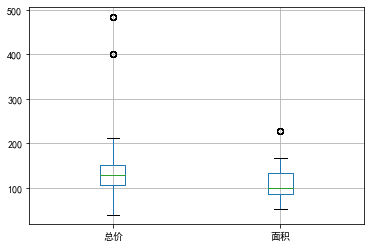

In [89]:
# plt.figure()
# p = newdata.boxplot(return_type='dict')

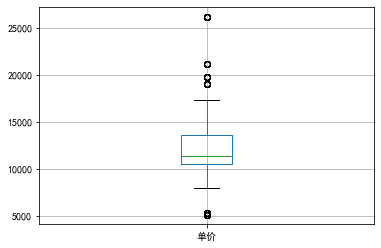

In [98]:
# newdata2=pd.read_excel('E:/an/pclass/contents/数值2.xlsx')

# plt.figure()
# p2 = newdata2.boxplot(return_type='dict')

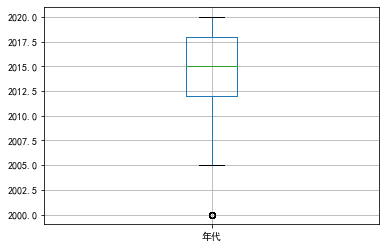

In [99]:
# newdata3=pd.read_excel('E:/an/pclass/contents/数值3.xlsx')

# plt.figure()
# p3 = newdata3.boxplot(return_type='dict')

In [100]:
# newdata3.describe()

,年代
count,1053.000000
mean,2014.528965
std,4.310034
min,2000.000000
25%,2012.000000
50%,2015.000000
75%,2018.000000
max,2020.000000


In [29]:
# 4.处理重复记录
# s=data.duplicated()
# print(s)
# data.drop_duplicates(inplace = False)


0       False
1       False
2       False
3       False
4       False
        ...  
1048    False
1049    False
1050    False
1051    False
1052    False
Length: 1053, dtype: bool


(1053, 12)

In [12]:
# for i in data.index:
#     sy=data.loc[i,['年代']].values
#     sy2=str(sy)
#     sy3=sy2.split('/')[0].split("['")[1]
#     data.loc[i,['年代']]=sy3
# #     print(sy3)

In [13]:
# data[data=='暂无建造年代']=0

In [14]:
# 5.处理字符型字段
# for i in data.index:
#     sy=data.loc[i,['年代']].values
#     if sy!=0:
#         val=data.loc[i,['年代']].values
#         val2=str(val)
#         val3=val2.split('年')[0].split("['")[1]
#         data.loc[i,['年代']]=val3
#         print(val3)
# for i in data.index:
#     sy=data.loc[i,['楼层']].values
#     if sy=='暂无楼层':
#         data.loc[i,['楼层']]=0

In [15]:
# data.head()

,楼盘,地址,单价,总价,户型,面积,年代,方向,楼层,装修,标题,详情url
0,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391元/㎡,67万,3室2厅1卫,71.4㎡,2016,南北,高层(共30层),精装修,颜龙山水城 3室2厅 精装修 南北通透 房东急置换 诚意买房,https://cq.58.com/ershoufang/2489182283504648x...
1,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391元/㎡,67万,3室2厅1卫,71.4㎡,0,南,0,精装修,两江新区 万华麓悦江城 重庆首开 千亩江城墅区 全屋豪装交付,https://cq.58.com/ershoufang/2307082909821961x...
2,恒景天苑,九龙坡华岩新城田坝二村160-163号,9391元/㎡,67万,3室2厅1卫,71.4㎡,2015,南北,低层(共30层),精装修,总部企业天地旁，正规三房，全网 ，真 格在售,https://cq.58.com/ershoufang/2349081413280783x...
3,嘉裕国际社区,江津双福新区创业路99号,5109元/㎡,45.8万,3室2厅1卫,89.7㎡,2020,南,低层(共18层),精装修,正南 4室2厅 万科观承观峰三组团 精装修,https://cq.58.com/ershoufang/2524594793339904x...
4,华宇城,沙坪坝凤天路凤西路169号,13864元/㎡,122万,3室2厅1卫,88㎡,2012,东,低层(共33层),精装修,杨家坪 保利花半里一期（玫瑰园） 3房,https://cq.58.com/ershoufang/2504268451881984x...
